# Assignment 1

#### Student ID: *Double click here to fill the Student ID*

#### Name: *Double click here to fill the name*

In [ ]:
#!pip install --pre pycaret[full] -qq
!pip install cleanlab -qq
!pip install modAL -qq
!pip install snorkel -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 KB 1.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

## Q1: Low-code Machine Learning with Ames housing dataset

In this question, we are going to examine the low-code ML framework. Assuming we are assigned to deal with a different housing dataset after we finish the California census data project.

We will use a modified version of the Ames housing dataset. The original data was compiled by Dean De Cock for use in data science education and published in [De Cock, D. (2011)](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). The modified version contains 2930 rows with 79 columns describing every aspect of residential homes in Ames, Iowa.  We will only use a subset of features and be sure to set the random seed to 2023 in the following problems.

Firstly, execute the following code snippet for data preparation:

In [ ]:
import numpy as np
import pandas as pd

from pycaret.regression import *

# Prepare data
df = pd.read_csv("ames.csv")            
low_cardinality_cols = [cname for cname in df.columns if df[cname].nunique() < 10 and 
                        df[cname].dtype == "object"]
# Select numeric columns
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
df = df[my_cols].copy()
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSold,SalePrice
0,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,210.0,62.0,0.0,0.0,0.0,0.0,0.0,5,2010,215000
1,Residential_High_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Feedr,Norm,...,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6,2010,105000
2,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6,2010,172000
3,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2010,244000
4,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3,2010,189900


(a) Split 5% of data as the test set for testing purposes using `train_test_split()`. (5%)

In [ ]:
df, data_unseen = train_test_split(df, test_size=0.05, random_state=2023)

(b) Use the `setup()` function to prepare the dataset for our ML model by fulfilling the following requirements: (10%)

* Features: All features in the `df` data frame, except the `SalePrice`
* Target: `SalePrice` 
* Split 25% of the data into the validation set
* Perform standardization for all features (You can assume that the data type belongs to `object` are categorical variables; otherwise, it is numerical variables)
* Perform one-hot encoding for all categorical features (`PyCaret` will discard one variable after one-hot encoding if the feature only has two levels and is regarded as an ordinal feature automatically, you do not have to change this behavior)

Hint: You may find the documentation (https://pycaret.readthedocs.io/en/latest/api/regression.html) useful. Note that PyCaret will [scale all features by default](https://github.com/pycaret/pycaret/issues/3076).

In [ ]:
# init setup with normalize = True
s = setup(df, target = 'SalePrice', session_id = 2023, train_size = 0.75, fold = 5, max_encoding_ohe = -1, categorical_features = low_cardinality_cols,
          normalize = True, normalize_method = 'zscore')

,Description,Value
0,Session id,2023
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(2783, 73)"
4,Transformed data shape,"(2783, 248)"
5,Transformed train set shape,"(2087, 248)"
6,Transformed test set shape,"(696, 248)"
7,Ordinal features,2
8,Numeric features,32
9,Categorical features,40


In [ ]:
# Get the PyCaret configuration
config = get_config('pipeline')

In [ ]:
X_train_transformed = get_config("X_train_transformed")

In [ ]:
X_train_transformed.shape

(2087, 247)

(c) Use `compare_models()` to perform 5-fold cross-validation by comparing the following models and selecting the best three models according to the MAE (mean absolute error) measure. (5%)

- Linear regression, Lasso regression, ridge regression, decision tree regressor, k-nearest neighbor regressor, random forest regressor, xgboost, lightgbm, and catboost.

List the top 3 best models according to the MAE measure.

In [ ]:
best_mae_models_top3 = compare_models(include = ['dt', 'rf', 'lr', 'knn', 'lasso', 'ridge', 'xgboost', 'lightgbm', 'catboost'], sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,14300.8739,540906494.5747,23087.4277,0.9116,0.1332,0.0899,11.0400
lightgbm,Light Gradient Boosting Machine,15705.2800,665335468.2709,25630.4399,0.8911,0.1414,0.0967,2.1980
rf,Random Forest Regressor,16740.4535,716798978.6001,26666.8128,0.8823,0.1511,0.1046,5.8740
xgboost,Extreme Gradient Boosting,17140.8980,698072940.0602,26366.0071,0.8848,0.1527,0.1067,3.9020
lasso,Lasso Regression,17233.0664,910105000.1268,29548.8217,0.8529,0.1730,0.1097,1.2820
ridge,Ridge Regression,17339.3280,948198285.2848,30192.0287,0.8468,0.1870,0.1102,0.8780
knn,K Neighbors Regressor,25050.5594,1434321761.8230,37750.3057,0.7635,0.2091,0.1545,1.5260
dt,Decision Tree Regressor,25309.3060,1446279571.5634,37862.2837,0.7605,0.2127,0.1517,4.1460
lr,Linear Regression,18307299974706264.0000,86812732311259337280299716665409536.0000,238359429800731456.0000,-14828956188499066765705216.0000,3.2429,182081365523.2244,1.2440


Processing:   0%|          | 0/43 [00:00<?, ?it/s]

(d) Choose the best model from (c) using `create_model()` and report the MAE on the test set in (a). (5%)

In [ ]:
catboost_model = create_model('catboost') 

# final_model = finalize_model(best_model) # You may use finalize model will also include the validation set

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13214.1703,387065871.6324,19673.9897,0.9311,0.1143,0.0797
1,14169.1615,466608166.7906,21601.1149,0.9223,0.1546,0.1008
2,15195.9446,727155697.8614,26965.8246,0.8918,0.1567,0.1001
3,14960.7194,667182755.8336,25829.8811,0.8966,0.1239,0.0863
4,13964.3737,456519980.7557,21366.3282,0.9160,0.1165,0.0825
Mean,14300.8739,540906494.5747,23087.4277,0.9116,0.1332,0.0899
Std,713.8702,131865630.3786,2806.6308,0.0150,0.0186,0.0089


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
from pycaret.utils.generic import check_metric
unseen_predictions = predict_model(catboost_model, data=data_unseen)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,15283.4714,601021611.1876,24515.7421,0.9220,0.1108,0.0863


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSold,SalePrice,prediction_label
0,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,...,0.0,0.0,0.0,0.0,0.0,0.0,4,2010,149900,165311.332791
1,Residential_Medium_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,26.0,0.0,0.0,0.0,0.0,0.0,7,2006,127000,129666.614498
2,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,133.0,0.0,0.0,0.0,0.0,0.0,2,2007,127000,130498.468423
3,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0.0,0.0,0.0,0.0,0.0,0.0,6,2010,128000,152554.735240
4,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Sev,Norm,Norm,...,0.0,112.0,0.0,0.0,0.0,0.0,12,2006,108480,111303.831476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,FR2,Gtl,Norm,Norm,...,0.0,225.0,0.0,0.0,0.0,600.0,6,2006,131000,135903.947844
143,Residential_Medium_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Artery,Norm,...,0.0,160.0,0.0,0.0,0.0,0.0,5,2007,137000,133802.791952
144,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,FR2,Gtl,Norm,Norm,...,45.0,0.0,0.0,0.0,0.0,0.0,6,2008,133000,141377.639280
145,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,90.0,0.0,0.0,0.0,0.0,0.0,5,2010,154000,151218.254765


In [ ]:
check_metric(unseen_predictions.SalePrice, unseen_predictions.prediction_label, 'MAE')

15283.4714

## Q2: Dealing with unlabeled dataset

In this question, we will practice the data preparation skill often used in a real-world project.

Assuming in the startup company, we are given an unlabeled dataset `data.csv` and a crowdsourcing labels `crowdsourcing.csv` from 50 workers. The data contains two features and 247 sample points. Each sample point belongs to one of 3 different classes. This is a practice project. Therefore we have access to the ground truth label `labels.csv`, **but the label can only be used to measure the accuracy, answer the queries from the active learning model, or initialize the active learning model. It can not be used in all the other training processes.** Be sure to set the random seed to 2023 in the following problems.

Firstly, read the dataset and divide it into training and testing sets using the following code snippet:

In [ ]:
X = pd.read_csv('data.csv', names=[0,1])
true_labels = np.loadtxt("labels.csv", delimiter=',')
multiannotator_labels = pd.read_csv('crowdsourcing.csv')

In [ ]:
X_train, X_test, multiannotator_labels, ano_unseen, Y_train, Y_test  = train_test_split(X, multiannotator_labels, true_labels, test_size=0.25, random_state=2023)

(a) We decide to use active learning first. Try randomly selecting one sample from each class in the training set and putting the remaining dataset into the query pool. Use the above three training samples and the corresponding training labels to train the following logistic regression classifier with L2 penalty: (10%)

```python
LogisticRegression(solver='liblinear', penalty='l2', C=10, random_state=2023)
```

Try to measure the classification accuracy on the test set for this classifier. 

In [ ]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

In [ ]:
np.random.seed(2023)

X_train_n = X_train.to_numpy()
# Get indices of each category
cat_indices = [np.where(Y_train == i)[0] for i in range(3)]

# Randomly select one value from each category
training_indices = [np.random.choice(cat, size=1)[0] for cat in cat_indices]


X_tr = X_train_n[training_indices]
Y_tr = Y_train[training_indices]

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_train_n, training_indices, axis=0)
y_pool = np.delete(Y_train, training_indices, axis=0)

In [ ]:
# Specify our core estimator along with it's active learning model.
lr = LogisticRegression(solver='liblinear', penalty='l2', C=10, random_state=2023) #KNeighborsClassifier(n_neighbors=3)
learner = ActiveLearner(estimator=lr, X_training=X_tr, y_training=Y_tr, query_strategy = uncertainty_sampling)

In [ ]:
unqueried_score = learner.score(X_test, Y_test)

In [ ]:
unqueried_score

0.6935483870967742

(b) Now use the model in (a) and run the active learning with pool-based sampling for 20 epochs using the `ActiveLearner` from [`modAL`](https://modal-python.readthedocs.io/en/latest/). The query strategy should be set to `uncertainty_sampling`, and you can use the ground truth label to answer the query. (10%)

Report the final classification accuracy on the test set and plot the line plot for the classification accuracy on the test set versus the epochs.

In [ ]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
  query_index, query_instance = learner.query(X_pool)

  # Teach our ActiveLearner model the record it has requested.
  # Here we assume the label comes from the true label!!!
  X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
  learner.teach(X=X, y=y)

  # Remove the queried instance from the unlabeled pool.
  X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

  # Calculate and report our model's accuracy.
  model_accuracy = learner.score(X_test, Y_test)
  print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

  # Save our model's performance for plotting.
  performance_history.append(model_accuracy)

Accuracy after query 1: 0.7581
Accuracy after query 2: 0.7742
Accuracy after query 3: 0.8226
Accuracy after query 4: 0.8387
Accuracy after query 5: 0.7419
Accuracy after query 6: 0.8548
Accuracy after query 7: 0.9355
Accuracy after query 8: 0.9355
Accuracy after query 9: 0.9355
Accuracy after query 10: 0.9516
Accuracy after query 11: 0.9355
Accuracy after query 12: 0.9355
Accuracy after query 13: 0.9516
Accuracy after query 14: 0.9355
Accuracy after query 15: 0.9516
Accuracy after query 16: 0.8871
Accuracy after query 17: 0.9194
Accuracy after query 18: 0.9355
Accuracy after query 19: 0.9355
Accuracy after query 20: 0.9355


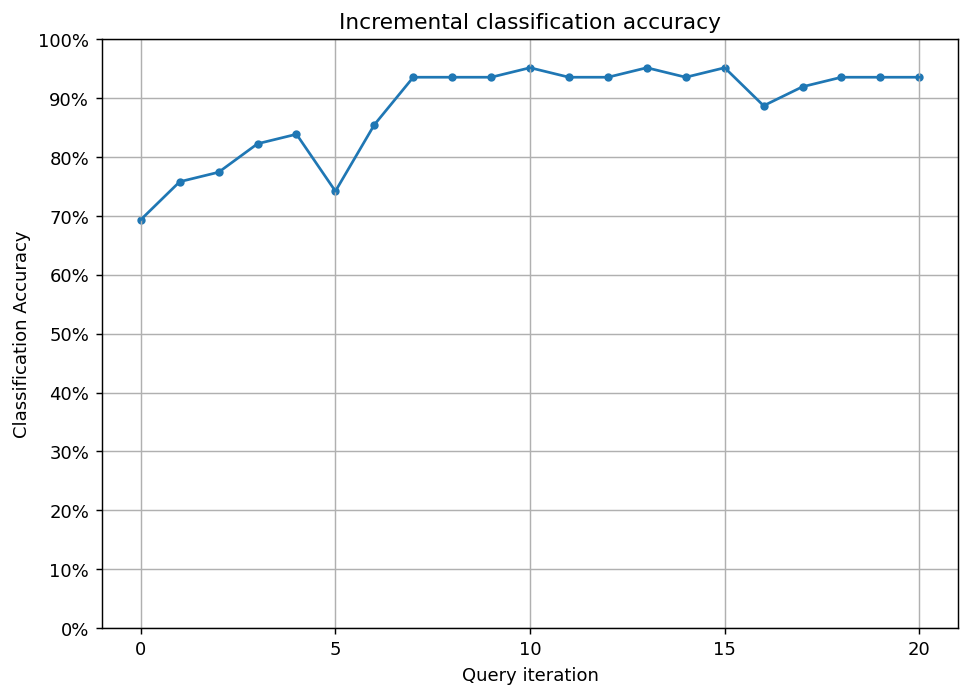

In [ ]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

(c) In the second trial, we will use the `Snorkel` to explore the crowdsourcing label. The idea is that each crowd worker can be considered a single labeling function, as each worker labels a subset of data points and may have errors or conflicting labels with other workers. The procedure is as follows: (10%)

- Write the labeling function and apply the labeling function to the training set. You can also directly convert the crowdsourcing data frame to a matrix
- Train the `LabelModel` using the crowdsourcing matrix obtained above (Note that you should not use the ground truth label here) and generate the prediction for each training sample
- Finally, calculate the accuracy of the label on the training set using the ground truth training label

Note that you need to use the following hyperparameters when training the [`LabelModel`](https://snorkel.readthedocs.io/en/master/packages/_autosummary/labeling/snorkel.labeling.model.label_model.LabelModel.html):

```
fit(L_train, n_epochs=500, seed=2023, log_freq=20, l2=0.1, lr=0.001)
```

Hint: If you want to write the label function, you can create one labeling function per worker, return the label the worker submitted for a given sample, and abstain if they didn’t submit a label.

In [ ]:
from snorkel.labeling import LabelingFunction
from snorkel.labeling import PandasLFApplier
from snorkel.labeling import LFAnalysis
from snorkel.labeling.model import LabelModel
from snorkel.analysis import metric_score

In [ ]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()

In [ ]:
multiannotator_labels

,A0001,A0002,A0003,A0004,A0005,A0006,A0007,A0008,A0009,A0010,...,A0041,A0042,A0043,A0044,A0045,A0046,A0047,A0048,A0049,A0050
56,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [ ]:
X_train

,index,0,1
0,56,1.833891,1.986990
1,50,3.997511,0.989576
2,124,-1.609701,3.922956
3,9,4.406965,0.918439
4,26,4.704541,0.724175
...,...,...,...
180,161,5.913099,5.750101
181,183,6.609610,6.113809
182,198,0.118656,6.326472
183,25,3.172067,1.676914


In [ ]:
# The first approach
multiannotator_dicts = {k: {k1: v1 for k1, v1 in v.items() if pd.notna(v1)} for k, v in multiannotator_labels.to_dict().items()}
ABSTAIN = -1


def worker_lf(x, worker_dict):
    return worker_dict.get(int(x['index']), ABSTAIN)


def make_worker_lf(worker_id):
    worker_dict = multiannotator_dicts[worker_id]
    name = f"worker_{worker_id}"
    return LabelingFunction(name, f=worker_lf, resources={"worker_dict": worker_dict})


worker_lfs = [make_worker_lf(worker_id) for worker_id in multiannotator_dicts]

In [ ]:
applier = PandasLFApplier(worker_lfs)
L_train = applier.apply(X_train)

100%|██████████| 185/185 [00:00<00:00, 2014.26it/s]


In [ ]:
L_train

array([[ 0, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1,  0],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1,  2, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [ ]:
# The seond aporach
aa = np.nan_to_num(multiannotator_labels.to_numpy(), nan=-1)

In [ ]:
np.sum(aa != L_train)

0

In [ ]:
# Train LabelModel.
label_model = LabelModel(cardinality=3, verbose=True)
label_model.fit(L_train, n_epochs=500, seed=2023, log_freq=20, l2=0.1, lr=0.001)

100%|██████████| 500/500 [00:03<00:00, 166.10epoch/s]


In [ ]:
snorkel_label = label_model.predict(L_train)

acc = metric_score(Y_train, snorkel_label, probs=None, metric="accuracy")
print(f"LabelModel Accuracy: {acc:.3f}")

LabelModel Accuracy: 0.827


In [ ]:
snorkel_accuracy = np.mean(Y_train == snorkel_label)

print(f"Accuracy of snorkel labels = {snorkel_accuracy}")

Accuracy of snorkel labels = 0.827027027027027


(d) In the third trial, we will use the [`cleanlab`](https://github.com/cleanlab/cleanlab) to explore the crowdsourcing label. The procedure is as follows: (10%)

- Firstly, get the majority vote labels using `get_majority_vote_label()` and compute out-of-sample predicted probabilities using 5-fold cross-validation for each sample using the training set with the majority vote labels. The model you use here should be the same as the one you use in (a)
- Use the `get_label_quality_multiannotator()` from cleanlab to get consensus labels by combining the out-of-sample predicted probabilities and the crowdsourcing label
- Finally, calculate the accuracy of both the majority and consensus label on the training set using the ground truth training label

In [ ]:
from cleanlab.multiannotator import get_label_quality_multiannotator, get_majority_vote_label
from sklearn.model_selection import cross_val_predict

In [ ]:
majority_vote_label = get_majority_vote_label(multiannotator_labels)
model = LogisticRegression(solver='liblinear', penalty='l2', C=10, random_state=2023)

num_crossval_folds = 5
pred_probs = cross_val_predict(
    estimator=model, X=X_train[[0,1]], y=majority_vote_label, cv=num_crossval_folds, method="predict_proba"
)

In [ ]:
results = get_label_quality_multiannotator(multiannotator_labels, pred_probs, verbose=False)

In [ ]:
results["label_quality"].head(10)

,consensus_label,consensus_quality_score,annotator_agreement,num_annotations
0,0,0.767837,0.833333,6
1,0,0.856672,0.250000,4
2,0,0.586393,1.000000,2
3,0,0.859614,0.750000,4
4,0,0.865189,0.666667,3
5,0,0.560090,1.000000,2
6,0,0.661598,0.166667,6
7,0,0.704640,0.250000,4
8,0,0.840896,1.000000,3
9,0,0.700425,1.000000,2


In [ ]:
improved_consensus_label = results["label_quality"]["consensus_label"].values

In [ ]:
majority_vote_accuracy = np.mean(Y_train == majority_vote_label)
cleanlab_label_accuracy = np.mean(Y_train == improved_consensus_label)

print(f"Accuracy of majority vote labels = {majority_vote_accuracy}")
print(f"Accuracy of cleanlab consensus labels = {cleanlab_label_accuracy}")

Accuracy of majority vote labels = 0.8108108108108109
Accuracy of cleanlab consensus labels = 0.9081081081081082


(e) Train three logistic regression classifiers with the same hyperparameters as (a) using the labels obtained from `Snorkel` in (c) and the majority-vote and consensus labels from (d). Report the classification accuracy on the test set. Which one performs best? (5%)

In [ ]:
sklearn_model = LogisticRegression(solver='liblinear', penalty='l2', C=10, random_state=2023)
sklearn_model.fit(X_train[[0,1]], snorkel_label)
print(f"Accuracy of trained model: {sklearn_model.score(X_test[[0,1]], Y_test)}")

Accuracy of trained model: 0.8709677419354839


In [ ]:
sklearn_model2 = LogisticRegression(solver='liblinear', penalty='l2', C=10, random_state=2023)
sklearn_model2.fit(X_train[[0,1]], majority_vote_label)
print(f"Accuracy of trained model: {sklearn_model2.score(X_test[[0,1]], Y_test)}")

Accuracy of trained model: 0.8870967741935484


In [ ]:
sklearn_model3 = LogisticRegression(solver='liblinear', penalty='l2', C=10, random_state=2023)
sklearn_model3.fit(X_train[[0,1]], improved_consensus_label)
print(f"Accuracy of trained model: {sklearn_model3.score(X_test[[0,1]], Y_test)}")

Accuracy of trained model: 0.9193548387096774


The model from cleanlab's concensus model performs best!

## Q3: Analyze Github repositories dataset using SQL

Kaggle has a rich number of [BigQuery](https://www.kaggle.com/datasets?fileType=bigQuery) and [SQLite](https://www.kaggle.com/datasets?fileType=sqlite) datasets that you can practice your SQL skill.

Assuming in the startup company, we join another project which aims to analyze a big dataset. The dataset is related to Github.  GitHub is the most popular place to collaborate on software projects. A GitHub **repository** (or **repo**) is a collection of files associated with a specific project. Most repos on GitHub are shared under a specific legal license, which determines the legal restrictions on their use. In addition, each project will be written using several programming languages. Finally, there are several statistics that show the popularity of repositories, like the watch number.

<p align="center">
<img src="https://drive.google.com/uc?id=1Z7ubmkY9JQMdHxAHD5O33gYJ0tNS9O-O" alt="drawing" width="1000"/>
</p>

In this example, we are asked to analyze the GitHub repositories dataset provided by our customer and it is hosted on https://www.kaggle.com/datasets/github/github-repos?select=languages.

Hint: Refer to our laboratory for useful commands.

Firstly, if you are using Colab, use the following code snippet to set up the client. For more detail, please refer to our lab.

In [ ]:
# @title Setup
from google.cloud import bigquery
from google.oauth2 import service_account

# TODO(developer): Set key_path to the path to the service account key file.

key_path = "lunar-pact-378812-7a28b789bde2.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

(a) In the first stage, explore the dataset using the following procedure: (10%)

- Print the names of all tables available in the dataset. 
- Print the table schema of the `languages` , `sample_repos` and the `licenses` tables.
- Preview the first ten rows of the above three tables by retrieving the data frame

Hint: the dataset can be access via `dataset_ref = client.dataset("github_repos", project="bigquery-public-data")`

In [ ]:
# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Get a list of available tables 
tables = list(client.list_tables(dataset))
for table in tables:  
    print(table.table_id)

commits
contents
files
languages
licenses
sample_commits
sample_contents
sample_files
sample_repos


In [ ]:
# Construct a reference to the "languages" table
languages_table_ref = dataset_ref.table("languages")
# API request - fetch the table
languages_table = client.get_table(languages_table_ref)

languages_table.schema

[SchemaField('repo_name', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('language', 'RECORD', 'REPEATED', None, None, (SchemaField('name', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('bytes', 'INTEGER', 'NULLABLE', None, None, (), None)), None)]

In [ ]:
# Construct a reference to the "sample_repos" table
sample_repos_table_ref = dataset_ref.table("sample_repos")

# API request - fetch the table
sample_repos_table = client.get_table(sample_repos_table_ref)

sample_repos_table.schema

[SchemaField('repo_name', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('watch_count', 'INTEGER', 'NULLABLE', None, None, (), None)]

In [ ]:
# Construct a reference to the "licenses" table
licenses_table_ref = dataset_ref.table("licenses")

# API request - fetch the table
licenses_table = client.get_table(licenses_table_ref)

licenses_table.schema

[SchemaField('repo_name', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('license', 'STRING', 'NULLABLE', None, None, (), None)]

In [ ]:
# Preview the first ten lines of the "languages" table
client.list_rows(languages_table, max_results=10).to_dataframe()

,repo_name,language
0,lemi136/puntovent,"[{'name': 'C', 'bytes': 80}]"
1,taxigps/nctool,"[{'name': 'C', 'bytes': 4461}]"
2,ahy1/strbuf,"[{'name': 'C', 'bytes': 5573}]"
3,nleiten/mod_rpaf-ng,"[{'name': 'C', 'bytes': 30330}]"
4,kmcallister/alameda,"[{'name': 'C', 'bytes': 17077}]"
5,TianYJ1/Snake,"[{'name': 'C', 'bytes': 10381}]"
6,doctorfree/Lds,"[{'name': 'C', 'bytes': 56413}]"
7,SumiMakito/ReinaJNIDemo,"[{'name': 'C', 'bytes': 7444}]"
8,serprex/rainbeam,"[{'name': 'C', 'bytes': 1964}]"
9,pdigiglio/oracolo,"[{'name': 'C', 'bytes': 1966}]"


In [ ]:
# Preview the first ten lines of the "sample_repos" table
client.list_rows(sample_repos_table, max_results=10).to_dataframe()

,repo_name,watch_count
0,FreeCodeCamp/FreeCodeCamp,90457
1,firehol/netdata,13208
2,joshbuchea/HEAD,13125
3,braydie/HowToBeAProgrammer,12019
4,sindresorhus/awesome,11063
5,tensorflow/tensorflow,10728
6,facebook/react,10458
7,ParsePlatform/parse-server,10339
8,loverajoel/jstips,9585
9,facebook/react-native,9437


In [ ]:
# Preview the first ten lines of the "licenses" table
client.list_rows(licenses_table, max_results=10).to_dataframe()

,repo_name,license
0,autarch/Dist-Zilla-Plugin-Test-TidyAll,artistic-2.0
1,thundergnat/Prime-Factor,artistic-2.0
2,kusha-b-k/Turabian_Engin_Fan,artistic-2.0
3,onlinepremiumoutlet/onlinepremiumoutlet.github.io,artistic-2.0
4,huangyuanlove/LiaoBa_Service,artistic-2.0
5,gitpan/Mojo-Server-FCGI,artistic-2.0
6,justincampbell/lambdaconf-2015,artistic-2.0
7,b4ldr/atlas-traceroute-to-bgp,artistic-2.0
8,MBAOS/A,artistic-2.0
9,elbehosg/sg_test1,artistic-2.0


(b) The `licenses` table provides information about the license used by each repository. Please write a query that returns a data frame that contains two columns by following the restrictions below: (10%)

* The first column is `license` from the `licenses` table (Remember the `SELECT... from` clause)
* The second column is `number_of_repos`, which is the number of repositories belonging to each license. (Remember the `COUNT` and `GROUP BY` clauses)
* Filter out the rows whose `number_of_repos` is smaller or equal to 50,000 (Remember the `HAVING` clause)
* Sort the resulting data frame by the `number_of_repos` column in descending order (Remember the `ORDER BY` clause)


In the retrieved data frame, which license is most popular?

In [ ]:
# coding your answer here.
query = """
                  SELECT license, COUNT(1) AS number_of_repos
                  FROM `bigquery-public-data.github_repos.licenses`
                  GROUP BY license
                  HAVING COUNT(1) > 50000
                  ORDER BY COUNT(1) DESC
                  """

############   Do not modify the code below     ############ 
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
results = query_job.to_dataframe()
############   Do not modify the code above     ############ 

In [ ]:
results

,license,number_of_repos
0,mit,1696489
1,apache-2.0,495134
2,gpl-2.0,341505
3,gpl-3.0,340407
4,bsd-3-clause,150701
5,bsd-2-clause,55221


mit is the most popular license!

(c) The `sample_repos` table contains information about the popularity of each repository. In addition, the `languages` table includes information on the programming language used by each repository. (10%)

Now, write a query that has a single row for each repository. Your results should have three columns (Remember the `SELECT...WHERE` clause) and follow the below restrictions: 

* Restrict the results to rows containing the word 'Python' in the `language` column of the `languages` table. (Remember the `SELECT...WHERE` clause and remember to use `UNNEST` clause)
* The first column `repo_name` contains the `repo_name` column from the `sample_repos` table (Remember the `INNER JOIN` clause)
* The second column `watch_count` contains the `watch_count` column from the `sample_repos` table 
* The third column `language` contains the `language` column from the `languages` table 
* Sort the resulting data frame by the `watch_count` column in descending order (Remember the `ORDER BY` clause)

In the retrieve data frame, which is the most popular repository that is written (Partially or totally) by Python?

Hint: Notice that in the table schema of `language` table, `language` is nested data with the type `REPEATED`.

In [ ]:
# coding your answer here.

query = """
                         SELECT sr.repo_name, sr.watch_count, l.language
                         FROM `bigquery-public-data.github_repos.languages` AS l,
                            UNNEST (l.language) AS lang
                         INNER JOIN `bigquery-public-data.github_repos.sample_repos` AS sr                             
                             ON sr.repo_name = l.repo_name                             
                         WHERE lang.name = 'Python'
                         ORDER BY sr.watch_count DESC
                         """

############   Do not modify the code below     ############ 
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
results = query_job.to_dataframe()
############   Do not modify the code above     ############ 

In [ ]:
results

,repo_name,watch_count,language
0,tensorflow/tensorflow,10728,"[{'name': 'Batchfile', 'bytes': 36962}, {'name..."
1,facebook/react,10458,"[{'name': 'C', 'bytes': 5227}, {'name': 'C++',..."
2,airbnb/caravel,7764,"[{'name': 'CSS', 'bytes': 57416}, {'name': 'HT..."
3,Rochester-NRT/AlphaGo,7200,"[{'name': 'CSS', 'bytes': 25934}, {'name': 'HT..."
4,apple/swift,7041,"[{'name': 'Batchfile', 'bytes': 47838}, {'name..."
...,...,...,...
31167,autopkg/grahamgilbert-recipes,2,"[{'name': 'Python', 'bytes': 17586}, {'name': ..."
31168,samuraisam/pynamo,2,"[{'name': 'Python', 'bytes': 67459}, {'name': ..."
31169,orvice/shadowsocks,2,"[{'name': 'Python', 'bytes': 157279}, {'name':..."
31170,Mioze7Ae/android_tools_repo,2,"[{'name': 'Python', 'bytes': 222696}, {'name':..."


The tensorflow repo is the most popular one!